In [0]:
seasons_stat = spark.read.option("header", True).csv("/Volumes/workspace/my_schema/my_volume/all_seasons.csv")


In [0]:

seasons_stat.printSchema()

seasons_stat.show(5)


root
 |-- _c0: string (nullable = true)
 |-- player_name: string (nullable = true)
 |-- team_abbreviation: string (nullable = true)
 |-- age: string (nullable = true)
 |-- player_height: string (nullable = true)
 |-- player_weight: string (nullable = true)
 |-- college: string (nullable = true)
 |-- country: string (nullable = true)
 |-- draft_year: string (nullable = true)
 |-- draft_round: string (nullable = true)
 |-- draft_number: string (nullable = true)
 |-- gp: string (nullable = true)
 |-- pts: string (nullable = true)
 |-- reb: string (nullable = true)
 |-- ast: string (nullable = true)
 |-- net_rating: string (nullable = true)
 |-- oreb_pct: string (nullable = true)
 |-- dreb_pct: string (nullable = true)
 |-- usg_pct: string (nullable = true)
 |-- ts_pct: string (nullable = true)
 |-- ast_pct: string (nullable = true)
 |-- season: string (nullable = true)

+---+----------------+-----------------+----+-------------+------------------+--------------------+-------+----------+--

In [0]:
seasons_cleaned = seasons_stat.dropna()


In [0]:
#Data cleaning
from pyspark.sql.functions import col

seasons_cleaned = seasons_cleaned.withColumn("player_height", col("player_height").cast("int")) \
                                 .withColumn("player_weight", col("player_weight").cast("int")) \
                                 .withColumn("pts", col("pts").cast("float")) \
                                 .withColumn("reb", col("reb").cast("float")) \
                                 .withColumn("ast", col("ast").cast("float"))


In [0]:
seasons_cleaned.createOrReplaceTempView("nba_cleaned")


In [0]:
spark.sql("""
    SELECT player_name, season, team_abbreviation, pts
    FROM nba_cleaned
    WHERE pts > 25
    ORDER BY pts DESC
""").show(10)


+--------------+-------+-----------------+----+
|   player_name| season|team_abbreviation| pts|
+--------------+-------+-----------------+----+
|  James Harden|2018-19|              HOU|36.1|
|   Kobe Bryant|2005-06|              LAL|35.4|
|  James Harden|2019-20|              HOU|34.3|
|   Joel Embiid|2022-23|              PHI|33.1|
| Allen Iverson|2005-06|              PHI|33.0|
|   Luka Doncic|2022-23|              DAL|32.4|
|Damian Lillard|2022-23|              POR|32.2|
| Tracy McGrady|2002-03|              ORL|32.1|
| Stephen Curry|2020-21|              GSW|32.0|
|  Kevin Durant|2013-14|              OKC|32.0|
+--------------+-------+-----------------+----+
only showing top 10 rows


In [0]:
avg_stats = seasons_cleaned.groupBy("player_name") \
    .agg({"pts": "avg", "reb": "avg", "ast": "avg"}) \
    .orderBy("avg(pts)", ascending=False)

avg_stats.show(10)


+----------------+------------------+------------------+------------------+
|     player_name|          avg(pts)|          avg(reb)|          avg(ast)|
+----------------+------------------+------------------+------------------+
|     Luka Doncic|27.700000381469728| 8.580000114440917| 8.020000076293945|
|    Kevin Durant|27.233333333333334| 7.073333358764648|4.4333333492279055|
|    LeBron James|27.199999809265137| 7.540000057220459| 7.340000033378601|
|     Joel Embiid|26.542857033865793|10.928571564810616|3.3142856529780795|
|   Allen Iverson|26.064285618918284| 3.692857129233224| 5.999999965940203|
|      Trae Young|25.720000076293946| 3.720000076293945| 9.339999961853028|
|  Damian Lillard|              25.5|  4.23636362769387| 6.781818216497248|
|  Michael Jordan|25.300000190734863|             5.875| 4.199999988079071|
| Zion Williamson|25.166666666666668| 6.833333333333333|3.4666666189829507|
|Donovan Mitchell| 24.81666628519694| 4.183333357175191| 4.516666690508525|
+-----------

In [0]:
seasons_cleaned = seasons_cleaned.withColumn("player_height", col("player_height").cast("int"))


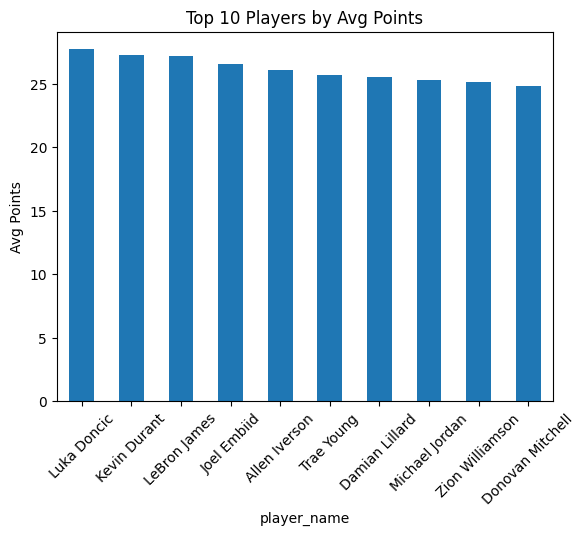

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

#to find the top 10 players who have the highest points
top10 = avg_stats.limit(10).toPandas()


top10.plot(kind="bar", x="player_name", y="avg(pts)", legend=False)
plt.title("Top 10 Players by Avg Points")
plt.ylabel("Avg Points")
plt.xticks(rotation=45)
plt.show()
